https://www.kaggle.com/datasets/vishakhdapat/price-of-used-toyota-corolla-cars

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/var/folders/cp/73rsjcf17vl86y5p35qds9kw0000gn/T/ipykernel_2912/694500839.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 2. Load the Dataset

In [2]:
df = pd.read_csv("data/ToyotaCorolla.csv")

## Check of Null Values

In [3]:
df.isna().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

There is no Null values in the data set, so look for duplicates and then proceed to clean some of the columns.

## Check for Duplicates

In [4]:
df.duplicated().sum()

0

There is no duplicated rows in the dataset, so now to go and get rid of unecessary columns.

## Cleaning the Dataset

In [ ]:
df.columns

I am dropping Age_08_04 since that is only the age from manufactured date to August 2004. I am also dropping CC because HP is more relevant when talking about cars. I am dropping ID because there is no purpose when an index does the smae thing. I am also goign to drop all of the guarantees columns because they have all expired by now. I also think that the quarterly tax column is usesless because the quarterly tax when this data was inputted has differed from now.

In [5]:
df = df[['Model', 'Price', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'Doors',
       'Cylinders', 'Gears',  'Weight',
       'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']]

Looking for the attributes of the Toyota Corolla with the lowest price.

In [6]:
print(df['KM'].max(), df["KM"].min(), df["KM"].mean())
print(df['Price'].max(), df["Price"].min(), df["Price"].mean())
print(df['Price'].loc[df['KM'] == df['KM'].max()])
print(df.loc[df['Price'] == df['Price'].min()])
print(df.loc[df['Price'] == df['Price'].max()])


243000 1 68533.25974930362
32500 4350 10730.824512534818
186    6950
Name: Price, dtype: int64
                                Model  Price  Mfg_Month  Mfg_Year      KM  \
191  TOYOTA Corolla 1.8D Stationwagen   4350          1      2001  158320   

    Fuel_Type  HP  Met_Color  Color  Automatic  ...  Powered_Windows  \
191    Diesel  69          0  White          0  ...                1   

     Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  \
191               1      0          0            0                 0   

     Metallic_Rim  Radio_cassette  Parking_Assistant  Tow_Bar  
191             0               0                  0        0  

[1 rows x 32 columns]
                                            Model  Price  Mfg_Month  Mfg_Year  \
109  TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV  32500          5      2004   

     KM Fuel_Type   HP  Met_Color Color  Automatic  ...  Powered_Windows  \
109   1    Diesel  116          0  Grey          0  ...               

<Axes: xlabel='KM', ylabel='Count'>

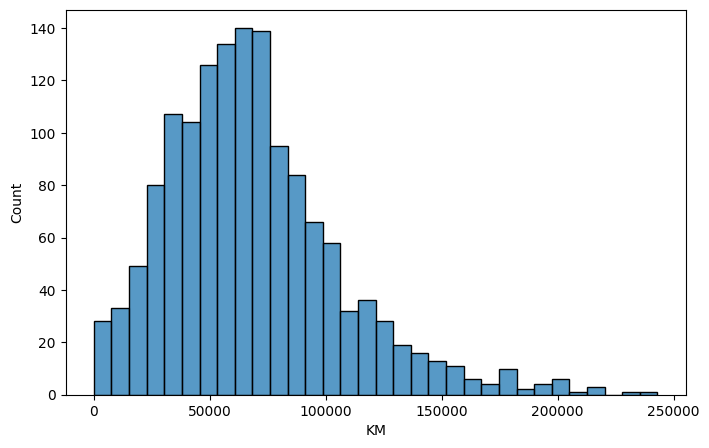

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="KM")

<Axes: xlabel='Price', ylabel='Count'>

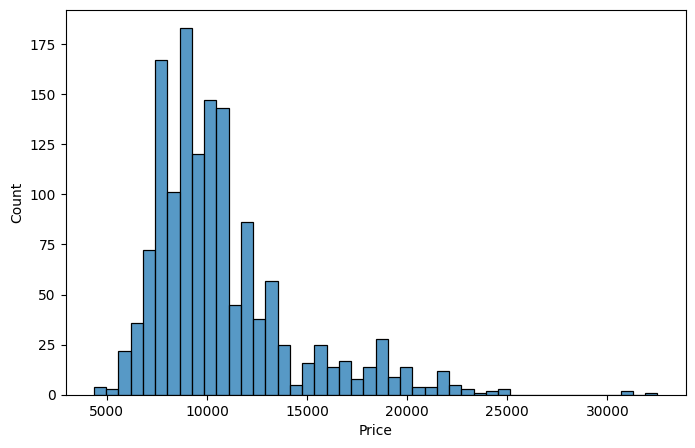

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Price")

After looking at histograms of the price as well as the KM of the used Toyota Corollas, I've decided to graph KM vs price.

<Axes: title={'center': 'KM vs Price'}, xlabel='KM', ylabel='Price'>

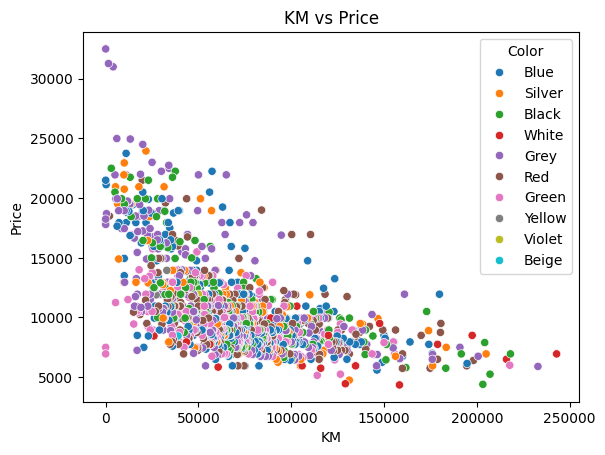

In [16]:
plt.title("KM vs Price")

sns.scatterplot(data=df, x="KM", y="Price", hue="Color")

<Axes: title={'center': 'KM vs Price'}, xlabel='KM', ylabel='Price'>

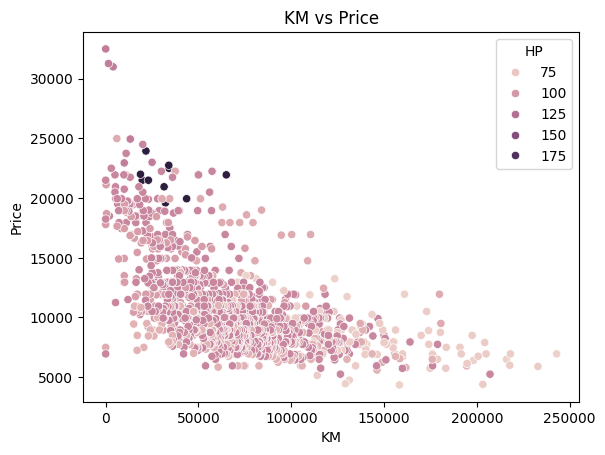

In [17]:
plt.title("KM vs Price")

sns.scatterplot(data=df, x="KM", y="Price", hue="HP")

<Axes: title={'center': 'KM vs Price'}, xlabel='KM', ylabel='Price'>

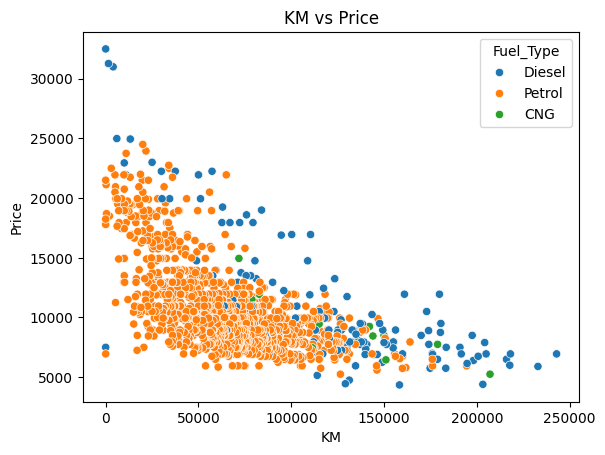

In [27]:
plt.title("KM vs Price")

sns.scatterplot(data=df, x="KM", y="Price", hue="Fuel_Type")

<Axes: xlabel='HP', ylabel='Count'>

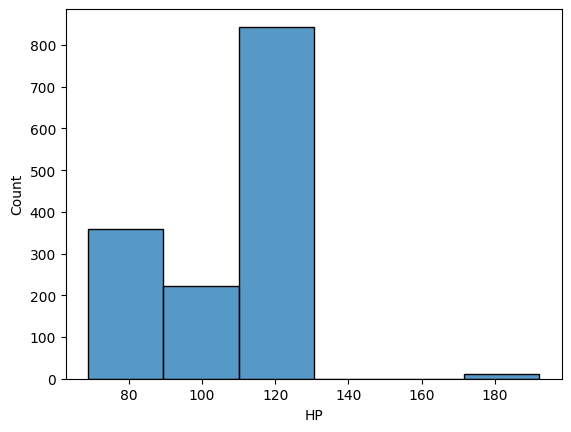

In [23]:
sns.histplot(data=df, x="HP", binwidth=20)

<Axes: title={'center': 'HP vs Weight'}, xlabel='HP', ylabel='Weight'>

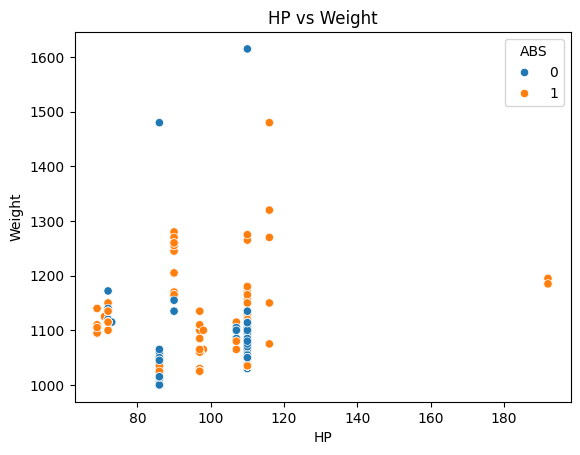

In [29]:
plt.title("HP vs Weight")

sns.scatterplot(data=df, x="HP", y="Weight", hue="ABS")

<Axes: title={'center': 'KM vs Price'}, xlabel='KM', ylabel='Price'>

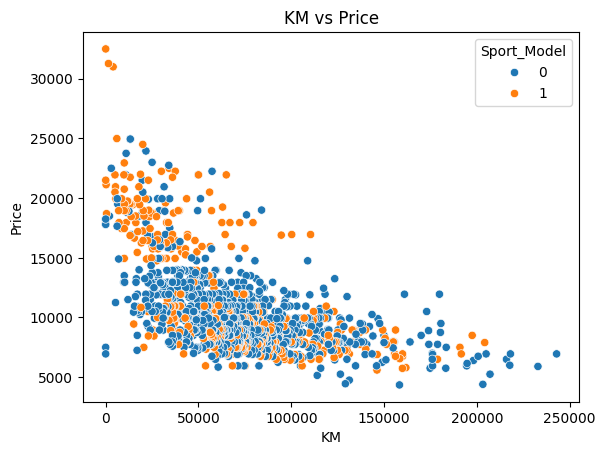

In [31]:
plt.title("KM vs Price")

sns.scatterplot(data=df, x="KM", y="Price", hue="Sport_Model")

<Axes: title={'center': 'Color vs Year'}, xlabel='Color', ylabel='Mfg_Year'>

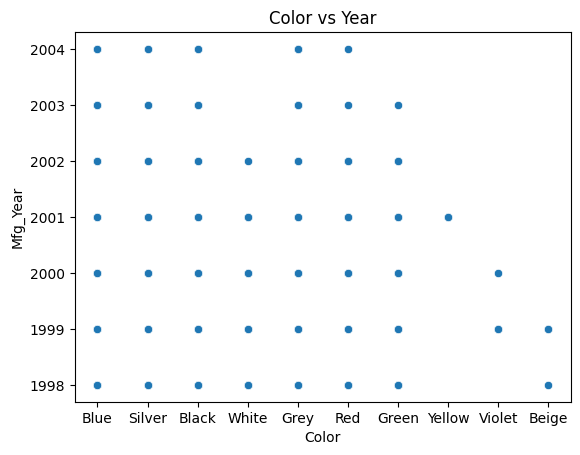

In [33]:
plt.title("Color vs Year")

sns.scatterplot(data=df, x="Color", y="Mfg_Year")

# Statiscally Analysis

1. What is the factor that contributes most to the car price?
    The most important factor when seeing how a car depreciates is the amount of KM on its odometer. The less Km on its odometer the more the car will be able to hold its value as seen by the fact that the most expensive car on this list has only 1KM registered.

2. Does the year the car was amanufactured affect the numver of colors of the model
    As the years of the manufactured cars increased the amount of colors that were manufactured declined.

3. Does the HP and/or whether the car is a sport model or not significantly contribute to the price of the car?
    Sport Model increase the price of the car, however for the HP of the car, there is not enough data to make an actual claim, but as it is right now, it seems that HP plays less of a role in the price of the car.